In [2]:
#K nearest neighbour

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import GridSearchCV

In [4]:
#load iris dataset
iris=ris=datasets.load_iris()
X=iris.data
y=iris.target


In [5]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
#standardizer data
#create standardizer
standardizer=StandardScaler()#the object I am defining

In [19]:
#standardize the features-Scalling
X_std=standardizer.fit_transform(X)
X_std

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

In [12]:
#fit a k-nearest neighbour classifier
#fit a knn classifier with 5 classifier
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean',n_jobs=-1).fit(X_std,y)#n_job=-1 use cpu as many as u can

In [16]:
#create search space of possible values of k
#create a pipeline-to avoid data leaking
pipe=Pipeline([('standardizer',standardizer),('knn',knn)])

In [20]:
#create space of candidate values
search_space=[{'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}]
#search over possible values of k
#create grid search GridSearchCV implements a 'fit' and a 'score' method(CV-cross Validators)
#the parameter of the estimator used to apply these methods are optimized
#by cross-validation grid_search over a parameter k

clf=GridSearchCV(pipe,search_space,cv=5,verbose=0).fit(X_std,y)
#view the value of k for best preforming model
clf.best_estimator_.get_params()['knn__n_neighbors']

6

In [21]:
#k-nearst neighbor classifier
#K-nearest classification (KNN) is a simple and powerful clasification learner.
#KNN has basic three parts:
#1) yi:the class of an observation(what are tryoing to predict in the test data)
#2)xi:the predictor or attribute of an observation
#3)k:a positive number specified by the researcher. k denotes the numberof observations closest to a partcular observation that defines its "neighbourhood". for example ,k=2 means that each observation has a neighborhood comprising of the two other observations closest to it.
#Imagine , we have an observation where we know its independent variable  xtest but donot know its class ytest. The knn learner finds the k other observations.
#that are closest to xtest and uses their known classes to assign a class to test.


In [22]:
#preliminaries
import pandas as pd
from sklearn import neighbors
import numpy as np
%matplotlib inline
import seaborn as sns

In [23]:
#create dataset
#here we create variables , test_1and test_2 are our independent variables,'outcome' is our dependent variable.
#we will use this data to train our learner

training_data=pd.DataFrame()
training_data['test_1']=[0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
training_data['test_2']=[0.5846,0.2654,0.2615,0.4538,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]
training_data['outcome']=['win','win','win','win','win','loss','loss','loss','loss','loss']
training_data

,test_1,test_2,outcome
0,0.3051,0.5846,win
1,0.4949,0.2654,win
2,0.6974,0.2615,win
3,0.3769,0.4538,win
4,0.2231,0.4615,win
5,0.3410,0.8308,loss
6,0.4436,0.4962,loss
7,0.5897,0.3269,loss
8,0.6308,0.5346,loss
9,0.5000,0.6731,loss


In [24]:
#now plot the data
#the scikit-learn library required the data be formatted
#as a numpy array. here doing the reformatting
X=training_data.as_matrix(columns=['test_1','test_2'])
y=np.array(training_data['outcome'])
X,y

(array([[ 0.3051,  0.5846],
        [ 0.4949,  0.2654],
        [ 0.6974,  0.2615],
        [ 0.3769,  0.4538],
        [ 0.2231,  0.4615],
        [ 0.341 ,  0.8308],
        [ 0.4436,  0.4962],
        [ 0.5897,  0.3269],
        [ 0.6308,  0.5346],
        [ 0.5   ,  0.6731]]),
 array(['win', 'win', 'win', 'win', 'win', 'loss', 'loss', 'loss', 'loss',
        'loss'], dtype=object))

In [25]:
#now train the learn
#we shall train a knn learner using parameter that an observation's neighborhood is its three closet neighbours.weight='uniform'
#can be thought of as the voting system used. for example, uniform means that all neighbors get an equally weighted 'vote' about an
#observation's class while weights='distance' would tell the learner to weigh each observation's 'vote' by its distance from 
#the observation we are classifying

clf=neighbors.KNeighborsClassifier(3,weights='uniform')
trained_model=clf.fit(X,y)
trained_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [26]:
#view the model's score
#how good is our trained model compared to our traing data?
(trained_model.score(X,y))

0.80000000000000004

In [27]:
#this means that our model is 80% accurate
#now applying the data model to a new test data point
x_test=np.array([[0.4,0.6]])
x_test

array([[ 0.4,  0.6]])

In [28]:
trained_model.predict_proba(x_test)

array([[ 0.66666667,  0.33333333]])

In [29]:
trained_model.predict(x_test)

array(['loss'], dtype=object)

   test_1  test_2 outcome
0  0.3051  0.5846     win
1  0.4949  0.2654     win
2  0.6974  0.2615     win
3  0.3769  0.4538     win
4  0.2231  0.4615     win
5  0.3410  0.8308    loss
6  0.4436  0.4962    loss
7  0.5897  0.3269    loss
8  0.6308  0.5346    loss
9  0.5000  0.6731    loss


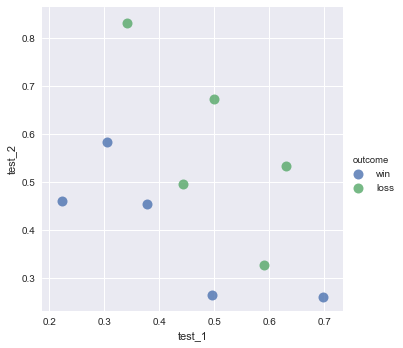

In [31]:
print(training_data)
sns.lmplot('test_1','test_2',data=training_data,fit_reg=False,hue='outcome',scatter_kws={'marker':'D','s':100})